# 1 Pakete importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 2 CSV-Dateien einlesen

In [2]:
csv_1 = "data/kunden.csv"
csv_2 = "data/besucher.csv"

In [3]:
df_1 = pd.read_csv(csv_1, sep = ";")
df_2 = pd.read_csv(csv_2, sep = ";")

In [4]:
df_1

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552
...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467
1100,38,48301.0,64230.98,1.0,33.0,K0122
1101,67,63547.0,103123.57,1.0,41.0,K1045
1102,37,32686.0,49215.87,1.0,36.0,K1096


In [5]:
df_2

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,"39919,0953348874",0,"29,0",K1814
1,41,"53430,67308587748",0,"27,0",K1544
2,64,"73163,2169267002",0,"32,0",K1945
3,41,"36761,482581315344",0,"44,0",K1825
4,35,"42684,33163178136",1,"33,0",K1144
...,...,...,...,...,...
886,32,"34391,82496545645",1,"48,0",K1211
887,41,"68516,49543941053",0,"34,0",K1375
888,65,"89685,33344089528",0,"23,0",K1965
889,68,"95714,30526812703",0,"32,0",K1540


# 3 Überblick über die Datentypen verschaffen

In [6]:
df_1.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

In [7]:
df_2.dtypes

Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

Zu ändern sind später: Einkommen --> float; Geschlecht --> int; Zeit --> float

# 4.1 df_1 Geschlecht mit fehlenden Werten

In [8]:
df_1.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64

In [9]:
df_1["Geschlecht"] = df_1["Geschlecht"].fillna(1) # Für 1 (Männlich) entschieden, da die meisten Ausprägungen 1 waren
df_1.isna().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

# df_1 Einkommen

In [10]:
df_1["Einkommen"].mean()

964474.8175955408

In [11]:
Q1 = df_1["Einkommen"].quantile(0.25)
Q3 = df_1["Einkommen"].quantile(0.75)
IQR = Q3 - Q1

In [12]:
Q1

46638.5

In [13]:
Q3

70298.0

In [14]:
IQR

23659.5

In [15]:
median_einkommen = df_1["Einkommen"].median()
median_einkommen

59013.0

In [16]:
df_1["Einkommen"] = df_1["Einkommen"].apply(lambda x: median_einkommen if x <= 0 or x >= 1000000 else x)

In [17]:
df_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,50.481884,58894.998188,88975.198714,0.639493,44.375906
std,12.225059,16509.072600,24464.067781,0.480365,10.848040
min,30.000000,14547.000000,21471.650000,0.000000,12.000000
25%,40.000000,46697.000000,70609.422500,0.000000,37.000000
50%,51.000000,59013.000000,88931.455000,1.000000,44.000000
75%,61.000000,70281.750000,107093.375000,1.000000,52.000000
max,120.000000,107689.000000,165482.310000,1.000000,80.000000


# df_1 Alter 

In [18]:
modalwert_alter = df_1["Alter"].mode()[0]
modalwert_alter

55

In [19]:
anzahl_personen_ueber_70 = len(df_1[df_1["Alter"] > 70])

In [20]:
anzahl_personen_ueber_70

2

In [21]:
df_1["Alter"] = df_1["Alter"].apply(lambda x: modalwert_alter if x >= 100 else x)

In [22]:
df_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,50.382246,58894.998188,88975.198714,0.639493,44.375906
std,11.953017,16509.072600,24464.067781,0.480365,10.848040
min,30.000000,14547.000000,21471.650000,0.000000,12.000000
25%,40.000000,46697.000000,70609.422500,0.000000,37.000000
50%,51.000000,59013.000000,88931.455000,1.000000,44.000000
75%,61.000000,70281.750000,107093.375000,1.000000,52.000000
max,70.000000,107689.000000,165482.310000,1.000000,80.000000


# 4.2 df_1 Daten umformen

In [23]:
df_1["Geschlecht"] = df_1["Geschlecht"].astype("int64")

In [24]:
df_1.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht      int64
Zeit          float64
KundeNr        object
dtype: object

# 5.2  df_2 Daten umformen

In [25]:
df_2["Einkommen"] = pd.to_numeric(df_2["Einkommen"].str.replace(',', '.'), errors="coerce")

In [26]:
df_2["Zeit"] = pd.to_numeric(df_2["Zeit"].str.replace(',', '.'), errors="coerce")

In [27]:
df_2.dtypes

Alter           int64
Einkommen     float64
Geschlecht      int64
Zeit          float64
KundeNr        object
dtype: object

# 6 Zusammenfügen von df_1 und df_2 zu df_3

In [28]:
df_3 = pd.concat([df_1, df_2],
                axis = 0, # Über die Zeilen zusammenfügen
                ignore_index = True)

In [29]:
df_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.000000,88160.31,1,43.0,K0310
1,54,77644.000000,103145.70,1,40.0,K1042
2,55,44341.000000,80565.16,0,37.0,K0382
3,49,67271.000000,83949.89,0,42.0,K0498
4,46,49832.000000,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1990,32,34391.824965,NaN,1,48.0,K1211
1991,41,68516.495439,NaN,0,34.0,K1375
1992,65,89685.333441,NaN,0,23.0,K1965
1993,68,95714.305268,NaN,0,32.0,K1540


# 7 Einkommen runden

In [30]:
df_3["Einkommen"] = df_3["Einkommen"].round(2)
df_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.00,88160.31,1,43.0,K0310
1,54,77644.00,103145.70,1,40.0,K1042
2,55,44341.00,80565.16,0,37.0,K0382
3,49,67271.00,83949.89,0,42.0,K0498
4,46,49832.00,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211
1991,41,68516.50,NaN,0,34.0,K1375
1992,65,89685.33,NaN,0,23.0,K1965
1993,68,95714.31,NaN,0,32.0,K1540


# 8.1 Textdatei einlesen

In [31]:
text_datei = "data/geo.txt"
df_text = pd.read_csv(text_datei, header=None, names=["Platzhalter"])
df_text

,Platzhalter
0,KundeNr\tNiederlassung
1,K0001\tSachsen
2,K0002\tNRW
3,K0003\tHessen
4,K0004\tBayern
...,...
1991,K1991\tHessen
1992,K1992\tBaden-Württemberg
1993,K1993\tNordrhein-Westfalen
1994,K1994\tBerlin


# 8.2 Überschriften 

In [32]:
df_text[["KundeNR", "Niederlassung"]] = df_text["Platzhalter"].str.split(expand=True)
df_text

,Platzhalter,KundeNR,Niederlassung
0,KundeNr\tNiederlassung,KundeNr,Niederlassung
1,K0001\tSachsen,K0001,Sachsen
2,K0002\tNRW,K0002,NRW
3,K0003\tHessen,K0003,Hessen
4,K0004\tBayern,K0004,Bayern
...,...,...,...
1991,K1991\tHessen,K1991,Hessen
1992,K1992\tBaden-Württemberg,K1992,Baden-Württemberg
1993,K1993\tNordrhein-Westfalen,K1993,Nordrhein-Westfalen
1994,K1994\tBerlin,K1994,Berlin


In [33]:
df_text

,Platzhalter,KundeNR,Niederlassung
0,KundeNr\tNiederlassung,KundeNr,Niederlassung
1,K0001\tSachsen,K0001,Sachsen
2,K0002\tNRW,K0002,NRW
3,K0003\tHessen,K0003,Hessen
4,K0004\tBayern,K0004,Bayern
...,...,...,...
1991,K1991\tHessen,K1991,Hessen
1992,K1992\tBaden-Württemberg,K1992,Baden-Württemberg
1993,K1993\tNordrhein-Westfalen,K1993,Nordrhein-Westfalen
1994,K1994\tBerlin,K1994,Berlin


In [34]:
df_text.columns

Index(['Platzhalter', 'KundeNR', 'Niederlassung'], dtype='object')

In [35]:
df_text = df_text.drop("Platzhalter", axis=1)


df_text.columns

# 9 Im df_3 neue Spalte erstellen

In [36]:
df_3 = df_3.copy()
df_3["Niederlassung"] = None
df_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.00,88160.31,1,43.0,K0310,None
1,54,77644.00,103145.70,1,40.0,K1042,None
2,55,44341.00,80565.16,0,37.0,K0382,None
3,49,67271.00,83949.89,0,42.0,K0498,None
4,46,49832.00,93781.58,0,41.0,K0552,None
...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,None
1991,41,68516.50,NaN,0,34.0,K1375,None
1992,65,89685.33,NaN,0,23.0,K1965,None
1993,68,95714.31,NaN,0,32.0,K1540,None


# 10 Spalte umbenennen 

In [37]:
df_3 = df_3.rename(columns={"KundeNr": "KundeNR"})
df_3.dtypes

Alter              int64
Einkommen        float64
Preis            float64
Geschlecht         int64
Zeit             float64
KundeNR           object
Niederlassung     object
dtype: object

# 11 Text-Datei mit CSV mergen

In [38]:
merged_df = pd.merge(df_3, df_text[["KundeNR", "Niederlassung"]], on="KundeNR", how="left")
merged_df

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung_x,Niederlassung_y
0,64,66894.00,88160.31,1,43.0,K0310,None,Bayern
1,54,77644.00,103145.70,1,40.0,K1042,None,Berlin
2,55,44341.00,80565.16,0,37.0,K0382,None,Baden-Württemberg
3,49,67271.00,83949.89,0,42.0,K0498,None,Bayern
4,46,49832.00,93781.58,0,41.0,K0552,None,Hessen
...,...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,None,Hessen
1991,41,68516.50,NaN,0,34.0,K1375,None,Sachsen
1992,65,89685.33,NaN,0,23.0,K1965,None,Bayern
1993,68,95714.31,NaN,0,32.0,K1540,None,Bayern


# 12 Spalte umbennen

In [39]:
merged_df = merged_df.rename(columns={"Niederlassung_y": "Niederlassung"})
merged_df = merged_df.drop("Niederlassung_x", axis = 1)
merged_df

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung
0,64,66894.00,88160.31,1,43.0,K0310,Bayern
1,54,77644.00,103145.70,1,40.0,K1042,Berlin
2,55,44341.00,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.00,83949.89,0,42.0,K0498,Bayern
4,46,49832.00,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,Hessen
1991,41,68516.50,NaN,0,34.0,K1375,Sachsen
1992,65,89685.33,NaN,0,23.0,K1965,Bayern
1993,68,95714.31,NaN,0,32.0,K1540,Bayern


# 13 Namen der Niederlassungen anzeigen

In [40]:
merged_df["Niederlassung"].unique()

array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
       'Sachsen', 'Nordrhein-Westfalen', 'BERLIN', 'Niedersachsen',
       'Hamburg', 'Brandenburg', 'Berlin-Mitte', 'Düsseldorf', 'NRW',
       'Berlin-Charlottenburg'], dtype=object)

# 14 Namen der Bundesländer fixen

In [41]:
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("BERLIN", "Berlin")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Berlin-Mitte", "Berlin")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Berlin-Charlottenburg", "Berlin")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Düsseldorf", "Nordrhein-Westfalen")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("NRW", "Nordrhein-Westfalen")
merged_df

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung
0,64,66894.00,88160.31,1,43.0,K0310,Bayern
1,54,77644.00,103145.70,1,40.0,K1042,Berlin
2,55,44341.00,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.00,83949.89,0,42.0,K0498,Bayern
4,46,49832.00,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,Hessen
1991,41,68516.50,NaN,0,34.0,K1375,Sachsen
1992,65,89685.33,NaN,0,23.0,K1965,Bayern
1993,68,95714.31,NaN,0,32.0,K1540,Bayern


In [42]:
merged_df["Niederlassung"].unique()

array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
       'Sachsen', 'Nordrhein-Westfalen', 'Niedersachsen', 'Hamburg',
       'Brandenburg'], dtype=object)

# 16. 1 Neue Spalte namens "Typ" erstellen (Kunden oder Besucher)

In [43]:
merged_df["Typ"] = merged_df["Preis"].apply(lambda x: 'Kunde' if pd.notna(x) else 'Besucher')

# 16.2 Spalte umpositionieren

In [44]:
merged_df.insert(0, "Typ", merged_df.pop("Typ"))
merged_df

,Typ,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung
0,Kunde,64,66894.00,88160.31,1,43.0,K0310,Bayern
1,Kunde,54,77644.00,103145.70,1,40.0,K1042,Berlin
2,Kunde,55,44341.00,80565.16,0,37.0,K0382,Baden-Württemberg
3,Kunde,49,67271.00,83949.89,0,42.0,K0498,Bayern
4,Kunde,46,49832.00,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...,...
1990,Besucher,32,34391.82,NaN,1,48.0,K1211,Hessen
1991,Besucher,41,68516.50,NaN,0,34.0,K1375,Sachsen
1992,Besucher,65,89685.33,NaN,0,23.0,K1965,Bayern
1993,Besucher,68,95714.31,NaN,0,32.0,K1540,Bayern


In [45]:
merged_df["Typ"].value_counts().get("Kunde")

1104

In [46]:
merged_df["Typ"].value_counts().get("Besucher")

891

# 17 CSV Speichern

In [47]:
merged_df.to_csv("data/df_final.csv", index = False)

# 18 Kundennummer als Index

In [48]:
merged_df.set_index("KundeNR", inplace=True)
merged_df


,Typ,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung
KundeNR,,,,,,,
K0310,Kunde,64,66894.00,88160.31,1,43.0,Bayern
K1042,Kunde,54,77644.00,103145.70,1,40.0,Berlin
K0382,Kunde,55,44341.00,80565.16,0,37.0,Baden-Württemberg
K0498,Kunde,49,67271.00,83949.89,0,42.0,Bayern
K0552,Kunde,46,49832.00,93781.58,0,41.0,Hessen
...,...,...,...,...,...,...,...
K1211,Besucher,32,34391.82,NaN,1,48.0,Hessen
K1375,Besucher,41,68516.50,NaN,0,34.0,Sachsen
K1965,Besucher,65,89685.33,NaN,0,23.0,Bayern


# Frage 1: Wie viele Autos wurden verkauft?

In [49]:
# Zöhle die Anzahl der Preise und gebe die Summe wieder
Sales = merged_df["Preis"].count()
Sales

1104

In [50]:
Sales_1 = df_1["Preis"].count()
Sales_1

1104

# Frage 2:  Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [51]:
Hoechstpreis = df_1["Preis"].max()
Mindestpreis = df_1["Preis"].min()
Durchschnittspreis = df_1["Preis"].mean().round(2)

In [52]:
Hoechstpreis

165482.31

In [53]:
Mindestpreis

21471.65

In [54]:
Durchschnittspreis

88975.2

# Frage 3:  Wie hoch war der Gesamtumsatz?


In [55]:
Gesamtumsatz = merged_df["Preis"].sum()
Gesamtumsatz

98228619.38000001

In [56]:
Gesamtumsatz_1 = df_1["Preis"].sum()
Gesamtumsatz_1

98228619.38000001

# Frage 4: Wie viele Autos wurden pro Bundesland verkauft?

In [ ]:
df = pd.read_csv('')

In [57]:
# Methode groupby() verwendet, um das DataFrame nach der Spalte "Niederlassung" zu gruppieren
Autos_pro_Bundesland = merged_df.groupby("Niederlassung")["Preis"].count()
Autos_pro_Bundesland

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    175
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64

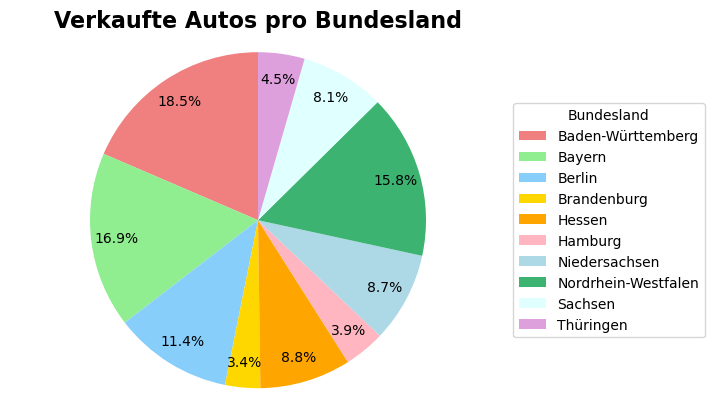

In [58]:
daten = {"Bundesland": ["Baden-Württemberg", "Bayern", "Berlin", "Brandenburg", "Hessen", "Hamburg", "Niedersachsen", "Nordrhein-Westfalen", "Sachsen", "Thüringen"],
        "Verkaufte_Autos": [203, 185, 125, 37, 96, 43, 95, 173, 89, 49]}
df_torte_daten = pd.DataFrame(daten)
farben_palette = ['lightcoral', 'lightgreen', 'lightskyblue', 'gold', 'orange', 'lightpink', 'lightblue', 'mediumseagreen', 'lightcyan', 'plum']

# Tortendiagramm erstellen
plt.pie(df_torte_daten["Verkaufte_Autos"], labels= None, autopct="%1.1f%%", startangle=90, colors=farben_palette, pctdistance = 0.85)

# Hinzufügen von Beschriftungen und Titel
plt.axis("equal")
plt.title("Verkaufte Autos pro Bundesland", fontsize = 16, fontweight= "bold")
plt.legend(df_torte_daten["Bundesland"], title="Bundesland", bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

# Frage 5:  Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [62]:
# Methode groupby() verwendet, um das DataFrame nach der Spalte "Niederlassung" zu gruppieren
durchschnittsumsatz_pro_bundesland = merged_df.groupby('Niederlassung')['Preis'].mean()
durchschnittsumsatz_pro_bundesland

Niederlassung
Baden-Württemberg      90969.560000
Bayern                 89344.313245
Berlin                 89584.984048
Brandenburg            86673.640811
Hamburg                85549.499070
Hessen                 85864.929479
Niedersachsen          87963.312500
Nordrhein-Westfalen    88633.265200
Sachsen                89455.080674
Thüringen              90816.994082
Name: Preis, dtype: float64

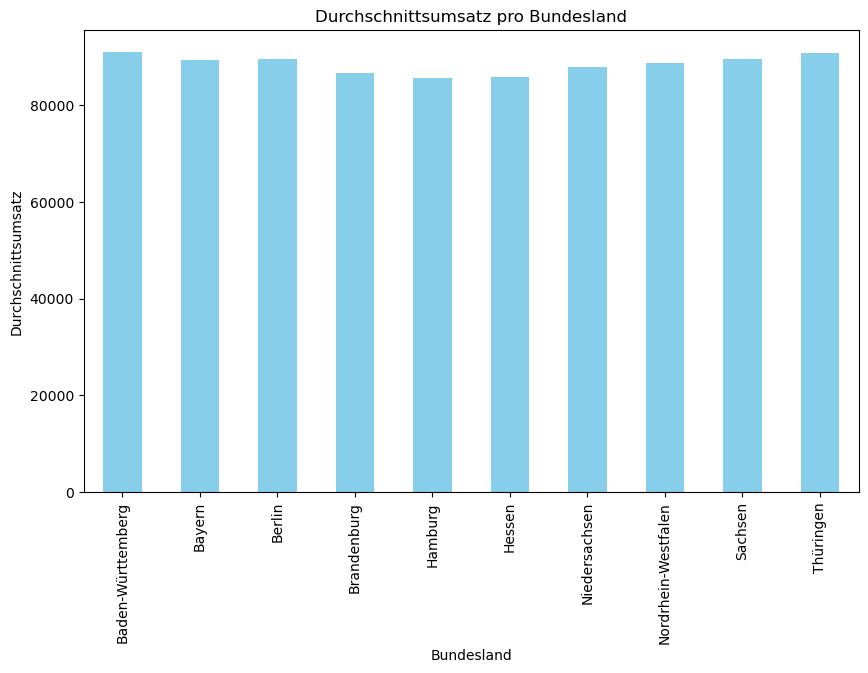

In [63]:
plt.figure(figsize=(10, 6))
durchschnittsumsatz_pro_bundesland.plot(kind='bar', color='skyblue')
plt.title('Durchschnittsumsatz pro Bundesland')
plt.xlabel('Bundesland')
plt.ylabel('Durchschnittsumsatz')
plt.show()

# Frage 6: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

In [ ]:
Kunden_Verteilung = merged_df[merged_df["Typ"] == "Kunde"].groupby("Geschlecht").size()

if Kunden_Verteilung.get(1, 0) > Kunden_Verteilung.get(0, 0):
    print("Männer machen die Mehrheit der Kunden aus.")
elif Kunden_Verteilung.get(1, 0) > Kunden_Verteilung.get(0, 0):
     print("Frauen machen die Mehrheit der Kunden aus.")   
else:
    print("50 % Männer und 50 % Frauen.")


In [ ]:
verteilung_nach_geschlecht = merged_df[merged_df["Typ"] == "Kunde"]["Geschlecht"].value_counts(normalize=True) * 100
anzahl_nach_geschlecht = merged_df[merged_df["Typ"] == "Kunde"]["Geschlecht"].value_counts()

# Balkendiagramm erstellen
colors = ["blue", "pink"]
plt.bar(["Männlich"], [verteilung_nach_geschlecht[1]], color="blue", label=f"Männlich ({anzahl_nach_geschlecht[1]})\n{verteilung_nach_geschlecht[1]:.2f}%")
plt.bar(["Weiblich"], [verteilung_nach_geschlecht[0]], color="pink", label=f"Weiblich ({anzahl_nach_geschlecht[0]})\n{verteilung_nach_geschlecht[0]:.2f}%")



plt.title("Verteilung der Kunden nach Geschlecht", fontsize = 16, fontweight= "bold")
plt.ylabel("Anteil (%)")
plt.legend()
plt.show()


In [ ]:
Kunden_Verteilung_1 = df_1["Geschlecht"].value_counts()

# Frage 7: Wie hoch ist das Durchschnittsalter unserer Kunden?

In [ ]:
Durchschnittsalter_Kunden = merged_df.loc[merged_df["Typ"] == "Kunde", "Alter"].mean().round(1)
Durchschnittsalter_Kunden

In [ ]:
Durchschnittsalter_Kunden_1 = df_1["Alter"].mean().round(1)
Durchschnittsalter_Kunden_1

# Frage 8:  Wie hoch ist das Durchschnittsalter der Besucher in unseren Showrooms?

In [ ]:
Durchschnittsalter_Kunden = merged_df.loc[merged_df["Typ"] == "Besucher", "Alter"].mean().round(1)
Durchschnittsalter_Kunden

In [ ]:
Durchschnittsalter_Besucher_1 = df_2["Alter"].mean().round(1)
Durchschnittsalter_Besucher_1 

# Frage 9: Durchschnittsalter männliche Kunden

In [ ]:
Bedingung = (merged_df["Typ"] == "Kunde") & (merged_df["Geschlecht"] == 1)
Durchschnittsalter_maennlich = merged_df.loc[Bedingung, "Alter"].mean().round(2)
Durchschnittsalter_maennlich

# Frage 10: Wie hoch ist das Durchschnittseinkommen unserer Kunden?

In [ ]:
Durchschnittseinkommen_Kunden = merged_df.loc[merged_df["Typ"] == "Kunde", "Einkommen"].mean().round(2)
Durchschnittseinkommen_Kunden

In [ ]:
Durchschnittseinkommen_Kunden = df_1["Einkommen"].mean().round(2)
Durchschnittseinkommen_Kunden

# Frage 11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit? (nur für die Kunden)

# Frage 12:  Wie ist die Variable Zeit verteilt? (Kunden und Besucher zusammen)


In [ ]:
print("Statistische Informationen zur Variable 'Zeit':")
print(merged_df["Zeit"].describe())

In [ ]:
x1 = plt.hist(merged_df["Zeit"], bins=10, edgecolor="black")
plt.title("Verteilung der variablen Zeit", fontsize = 16, fontweight= "bold")
plt.ylabel("Anteil (%)")
plt.xlabel("Zeit (Minuten)")
plt.ylabel("Häufigkeit")
plt.show()


In [ ]:
y1 = np.linspace(-2, 2, 1000)
pdf_values = norm.pdf(y1, 0, 1)

# Diagramm erstellen
plt.plot(y1, pdf_values)

# Achsenbeschriftungen ausblenden
plt.axis('off')
plt.show()

# Frage 13: Wie viele Kunden haben keinen Kredit bei der Bank genommen?

In [ ]:
#Kunden_ohne_Kredit_1 = df_1[df_1["Einkommen"] > df_1["Preis"]].shape[0]
#Kunden_ohne_Kredit_1

In [ ]:
# Kunden Jahreseinkommen > Autopreis = kein Bankkredit 
Kunden_ohne_Kredit = merged_df.loc[merged_df["Einkommen"] > merged_df["Preis"]].shape[0]
Kunden_ohne_Kredit

In [ ]:
# Anzeigen der Kunden, die keinen Kredit genommen haben
merged_df.loc[merged_df["Einkommen"] > merged_df["Preis"]]

# Frage 14: Welches sind die sozioökonomischen Merkmale der Kunden, die den Kaufpreis beeinflussen? 


# Frage 15: Prognostiziere den Kaufpreis für(m, 32, 30000) & (m, 51, 54000)

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Daten vorbereiten
data_for_model = merged_df.dropna(subset=['Preis'])

# Features auswählen und aufbereiten
features = ['Alter', 'Einkommen', 'Geschlecht']
X = data_for_model[features]
y = data_for_model['Preis']

# Konstante zu den Features hinzufügen
X = sm.add_constant(X)

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression erstellen und trainieren
model = sm.OLS(y_train, X_train)
result = model.fit()

# Szenarien vorbereiten
szenario_1 = pd.DataFrame([[1, 32, 30000, 1]], columns=['const', 'Alter', 'Einkommen', 'Geschlecht'])
szenario_2 = pd.DataFrame([[1, 51, 54000, 1]], columns=['const', 'Alter', 'Einkommen', 'Geschlecht'])

# Vorhersagen für die Szenarien machen
prediction_1 = result.predict(szenario_1)
prediction_2 = result.predict(szenario_2)

# Ergebnisse ausgeben
print("Ergebnis für m, 32, 3000", prediction_1)
print("Ergebnis für m, 51, 54000", prediction_2)


# Frage 16: Welche Variable beeinflusst den Preis des Autos am meisten?

# Frage 17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt.

# Frage 18: Wie hoch ist die Wahrscheinlichkeit, dass Autokauf zustande kommt bei: (m, 32y, 30000€, 30min) & (m, 51y, 54000€, 45min)

In [ ]:
from statsmodels.api import add_constant

# Szenarien vorbereiten
szenario_1 = pd.DataFrame({
    'const': [1],
    'Alter': [32],
    'Einkommen': [30000],
    'Geschlecht': [1],
    'Zeit': [30]
})

szenario_2 = pd.DataFrame({
    'const': [1],
    'Alter': [51],
    'Einkommen': [54000],
    'Geschlecht': [1],
    'Zeit': [45]
})

# Spalten im trainierten Modell
model_columns = result.model.exog_names

# Spalten in den Szenarien anpassen
szenario_1 = szenario_1[model_columns]
szenario_2 = szenario_2[model_columns]

# Vorhersagen für die beiden Szenarien machen
predicted_probabilities_1 = result.predict(szenario_1)
predicted_probabilities_2 = result.predict(szenario_2)

# Wahrscheinlichkeiten in Prozent umrechnen
predicted_probabilities_1 *= 100
predicted_probabilities_2 *= 100

# Ergebnisse ausgeben
print("Wahrscheinlichkeit für Szenario 1:", predicted_probabilities_1)
print("Wahrscheinlichkeit für Szenario 2:", predicted_probabilities_2)
